# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create an empty data frame to save the data
cities_pd = pd.DataFrame(columns = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [4]:
print("Beginning Data Retrieval\n-----------------------------")
base_url = "https://api.openweathermap.org/data/2.5/find?units=imperial"
total_counts = len(cities)
for city in cities:
    address = city
    query_url = f"{base_url}&q={address}&appid={api_key}"
    try:
        response = requests.get(query_url).json()
        #proceed after 0.05 second
        time.sleep(0.05)
        #check if the city is in the database
        response["count"]==1
        #update the data frame with new row of data for each city
        cities_pd.loc[cities.index(city)] = [city,response["list"][0]["clouds"]["all"],response["list"][0]["sys"]["country"],response["list"][0]["dt"],response["list"][0]["main"]["humidity"],response["list"][0]["coord"]["lat"],response["list"][0]["coord"]["lon"],response["list"][0]["main"]["temp_max"],response["list"][0]["wind"]["speed"]]
        print(f"Processing Record {cities.index(city)+1} of {total_counts} | {city}")
        
    except:
        print("City not found. Skipping...")
        #total_cities = len(cities)-1 #update the total number of cities
        #del(cities[cities.index(city)]) #delete this unfound city from the cities list



Beginning Data Retrieval
-----------------------------
Processing Record 1 of 611 | busselton
Processing Record 2 of 611 | lasa
Processing Record 3 of 611 | monrovia
Processing Record 4 of 611 | prince rupert
Processing Record 5 of 611 | ilulissat
Processing Record 6 of 611 | rikitea
Processing Record 7 of 611 | cape town
Processing Record 8 of 611 | san quintin
Processing Record 9 of 611 | chokurdakh
Processing Record 10 of 611 | kapaa
Processing Record 11 of 611 | esperance
Processing Record 12 of 611 | ribeira grande
Processing Record 13 of 611 | tasiilaq
City not found. Skipping...
Processing Record 15 of 611 | tuktoyaktuk
Processing Record 16 of 611 | new norfolk
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of 611 | pevek
Processing Record 20 of 611 | mount gambier
Processing Record 21 of 611 | negombo
Processing Record 22 of 611 | port elizabeth
Processing Record 23 of 611 | houma
Processing Record 24 of 611 | bambous virieux
Processing Record 25 o

Processing Record 211 of 611 | kalemie
Processing Record 212 of 611 | deputatskiy
Processing Record 213 of 611 | antalaha
Processing Record 214 of 611 | lala
Processing Record 215 of 611 | padova
Processing Record 216 of 611 | floro
Processing Record 217 of 611 | kreminna
City not found. Skipping...
City not found. Skipping...
Processing Record 220 of 611 | inhambane
Processing Record 221 of 611 | minab
Processing Record 222 of 611 | avarua
Processing Record 223 of 611 | esil
Processing Record 224 of 611 | filadelfia
Processing Record 225 of 611 | fortuna
Processing Record 226 of 611 | jiangyou
Processing Record 227 of 611 | manakara
City not found. Skipping...
Processing Record 229 of 611 | timbiqui
Processing Record 230 of 611 | buchanan
Processing Record 231 of 611 | sao jose da coroa grande
Processing Record 232 of 611 | abulug
Processing Record 233 of 611 | upernavik
Processing Record 234 of 611 | hofn
Processing Record 235 of 611 | rivera
Processing Record 236 of 611 | taixing
Pr

Processing Record 421 of 611 | shipunovo
Processing Record 422 of 611 | byron bay
Processing Record 423 of 611 | ancud
Processing Record 424 of 611 | koboko
Processing Record 425 of 611 | hun
Processing Record 426 of 611 | nelson bay
City not found. Skipping...
Processing Record 428 of 611 | valparaiso
Processing Record 429 of 611 | coahuayana
Processing Record 430 of 611 | te anau
City not found. Skipping...
Processing Record 432 of 611 | penzance
Processing Record 433 of 611 | polyarnyy
Processing Record 434 of 611 | rawson
Processing Record 435 of 611 | luanda
Processing Record 436 of 611 | olenino
Processing Record 437 of 611 | chengde
Processing Record 438 of 611 | nchelenge
City not found. Skipping...
Processing Record 440 of 611 | mabaruma
Processing Record 441 of 611 | zeya
Processing Record 442 of 611 | asyut
Processing Record 443 of 611 | campos altos
Processing Record 444 of 611 | lata
Processing Record 445 of 611 | beloha
Processing Record 446 of 611 | cabedelo
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#reset the index
cities_pd.reset_index(inplace=True)
cities_pd.drop(columns="index",inplace=True)
#export the city data into a .csv
cities_pd.to_csv("Cities.csv")

In [32]:
cities_pd.count()

Unnamed: 0    551
City          551
Cloudiness    551
Country       547
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [33]:
cities_pd.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,busselton,0,AU,1572865774,50,-33.6445,115.3489,61.0,13.65
1,1,lasa,20,CY,1572865745,41,34.9245,32.5278,78.8,6.93
2,2,monrovia,75,LR,1572865830,79,6.3280,-10.7978,84.2,5.99
3,3,prince rupert,90,CA,1572865774,100,54.3161,-130.3202,50.0,2.24
4,4,ilulissat,75,GL,1572865791,45,69.2167,-51.1000,24.8,19.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

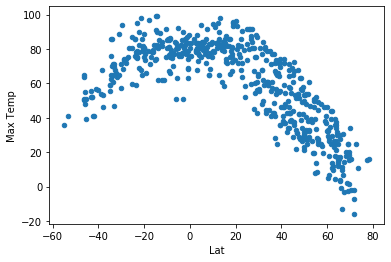

In [34]:
cities_pd["Max Temp"] = pd.to_numeric(cities_pd["Max Temp"],errors='coerce')
cities_pd.plot("Lat","Max Temp",kind="scatter")

#### Latitude vs. Humidity Plot

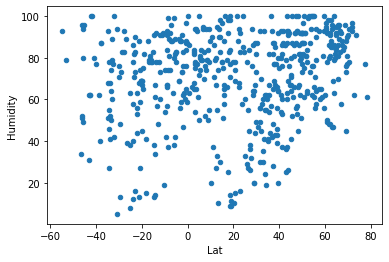

In [35]:
cities_pd["Humidity"] = pd.to_numeric(cities_pd["Humidity"],errors='coerce')
cities_pd.plot("Lat","Humidity",kind="scatter")

#### Latitude vs. Cloudiness Plot

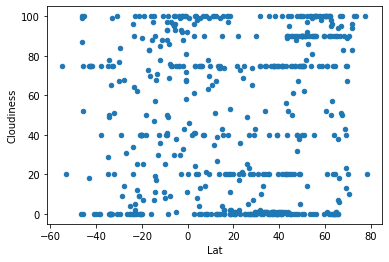

In [36]:
cities_pd["Cloudiness"] = pd.to_numeric(cities_pd["Cloudiness"],errors='coerce')
cities_pd.plot("Lat","Cloudiness",kind="scatter")

#### Latitude vs. Wind Speed Plot

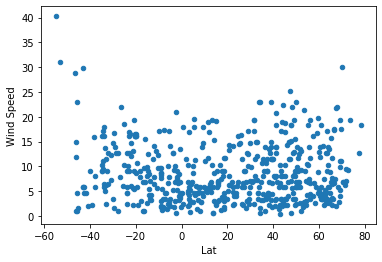

In [37]:
cities_pd["Wind Speed"] = pd.to_numeric(cities_pd["Wind Speed"],errors='coerce')
cities_pd.plot("Lat","Wind Speed",kind="scatter")

# three observable trends based on the data# Three 
1. 